In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [39]:
seed = 42

# Homework 4

## 1 The Bias Variance Trade-off

### 1.1 Theoretical Decomposition of the Mean Squared Error

done on paper

### 1.2 Practical Demonstration of the Bias-Variance Trade-Off

read and done

## 2 Polynomial Kernel SVM

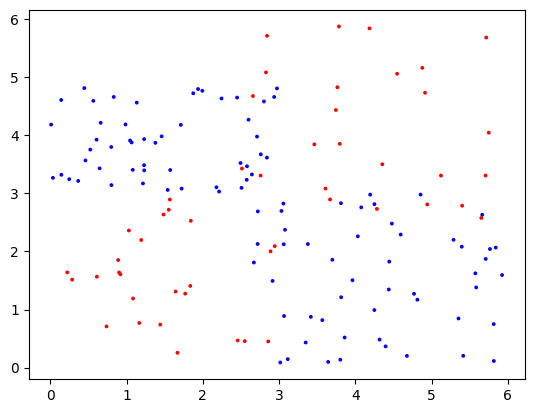

In [40]:
# 1. Load the data
datapoints = np.load('svm_data_3.npy')
X, Y, label = datapoints[:,0], datapoints[:,1], datapoints[:,2]

plt.scatter(X,Y,3, label, cmap='bwr')
plt.show()

In [41]:
# splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(
    datapoints[:,:2], 
    datapoints[:,2], 
    test_size=0.2, 
    random_state=seed,
    )

In [ ]:
# 2. Train the SVM
grid = {
    'C': [1, 1.5, 2, 2.5], 
    'gamma': [0.2, 0.1, 'scale'],
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5],
    'coef0': [0, 1, 2, 3],
} 

clf = GridSearchCV(SVC(), grid, n_jobs=-1)
clf.fit(X_train, Y_train)

clf.best_params_
clf.best_score_

In [54]:
# plot the decision boundary

w0_values = np.linspace( 0, 6, 100)
w1_values = np.linspace( 0, 6, 100)
W0, W1 = np.meshgrid(w0_values, w1_values)
print(W0.shape)

(100, 100)
